In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
data = pd.read_csv('instagram_reach.csv')
print(data.head())

   Unnamed: 0  S.No              USERNAME  \
0           0     1         mikequindazzi   
1           1     2       drgorillapaints   
2           2     3    aitrading_official   
3           3     4  opensourcedworkplace   
4           4     5           crea.vision   

                                             Caption  Followers  \
0  Who are #DataScientist and what do they do? >>...       1600   
1  We all know where it’s going. We just have to ...        880   
2  Alexander Barinov: 4 years as CFO in multinati...        255   
3                                               sfad        340   
4  Ever missed a call while your phone was chargi...        304   

                                            Hashtags Time since posted  Likes  
0  #MachineLearning #AI #DataAnalytics #DataScien...          11 hours    139  
1   #deck .#mac #macintosh#sayhello #apple #steve...           2 hours     23  
2  #whoiswho #aitrading #ai #aitradingteam#instat...           2 hours     25  
3  #io

In [ ]:
data.describe()

,Unnamed: 0,S.No,Followers,Likes
count,94.000000,94.000000,94.000000,94.000000
mean,9.000000,16.117021,942.627660,47.882979
std,6.771223,7.481671,1023.894946,56.501757
min,0.000000,1.000000,11.000000,8.000000
25%,4.000000,10.000000,231.000000,19.000000
50%,8.000000,16.000000,593.500000,29.500000
75%,12.750000,22.000000,1177.000000,46.000000
max,26.000000,30.000000,4496.000000,349.000000


In [ ]:
data.describe(include='all')

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
count,94.000000,94.000000,94,94,94.000000,94,94,94.000000
unique,NaN,NaN,90,94,NaN,92,11,NaN
top,NaN,NaN,mikequindazzi,Who are #DataScientist and what do they do? >>...,NaN,#DeepLearning #MachineLearning#ArtificialIntel...,2 hours,NaN
freq,NaN,NaN,4,1,NaN,2,53,NaN
mean,9.000000,16.117021,NaN,NaN,942.627660,NaN,NaN,47.882979
std,6.771223,7.481671,NaN,NaN,1023.894946,NaN,NaN,56.501757
min,0.000000,1.000000,NaN,NaN,11.000000,NaN,NaN,8.000000
25%,4.000000,10.000000,NaN,NaN,231.000000,NaN,NaN,19.000000
50%,8.000000,16.000000,NaN,NaN,593.500000,NaN,NaN,29.500000
75%,12.750000,22.000000,NaN,NaN,1177.000000,NaN,NaN,46.000000


In [ ]:
data.shape

(94, 8)

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,94.0,NaN,NaN,NaN,9.0,6.771223,0.0,4.0,8.0,12.75,26.0
S.No,94.0,NaN,NaN,NaN,16.117021,7.481671,1.0,10.0,16.0,22.0,30.0
USERNAME,94,90,mikequindazzi,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Caption,94,94,Who are #DataScientist and what do they do? >>...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Followers,94.0,NaN,NaN,NaN,942.62766,1023.894946,11.0,231.0,593.5,1177.0,4496.0
Hashtags,94,92,#DeepLearning #MachineLearning#ArtificialIntel...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time since posted,94,11,2 hours,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Likes,94.0,NaN,NaN,NaN,47.882979,56.501757,8.0,19.0,29.5,46.0,349.0


In [ ]:
data.tail()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222
99,12,25,palmariusdev,Obtén tu tienda en línea ahora.,741,#marketing #programming#development #desarroll...,3 hours,109


In [ ]:
data[data.duplicated()]

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes


In [ ]:
data.sample()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
81,8,13,ah_studio_,Hatsu Veggie Milk 🎯 Ref 02. Piece O1 - 03,888,#hatsu #hatsulovers #design #artdirection#setd...,2 hours,43


In [ ]:
data.sample(10)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
68,6,18,shine_my_idol,Life is all about the next step💎,371,#Entrepreneur#Business#Entrepreneurship#WontSt...,2 hours,19
76,3,8,flornasweets,Its a unicorn kind of day 💖.,181,#cookie #cookier #baking #icing #flooding#crea...,2 hours,11
87,0,9,onlyonecoops,"Love coaching these boys! Hard working, dedica...",262,#grassroots #development#kidsplayingfootball #...,2 hours,9
90,3,13,the_ios_developer,4K Ai,863,#developer #coding #programmer #javascript #pr...,2 hours,32
58,19,27,ivarski,Morning swim before the sun is up 🇮🇹☀️,918,#livinginitaly #tuscanyitaly#summerinitaly🇮🇹 ...,2 hours,21
77,4,9,lpsahil,Dude...That's Huge! A Super Massive Lathe!,631,#exklusive_shot #trb_autozone#carsofinstagram ...,2 hours,55
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
78,5,10,vaultcolombia,Nike Air 270. Pocas unidades disponibles. Info...,246,#gear #mensfashion #womenfashion #lids#product...,2 hours,12
32,5,14,blocsidesports,#WorldCup is here and BlocSide is bringing bac...,894,#sports #football #footy #footballfans#footbal...,2 hours,14
99,12,25,palmariusdev,Obtén tu tienda en línea ahora.,741,#marketing #programming#development #desarroll...,3 hours,109


In [ ]:
data.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              0
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         94 non-null     int64 
 1   S.No               94 non-null     int64 
 2   USERNAME           94 non-null     object
 3   Caption            94 non-null     object
 4   Followers          94 non-null     int64 
 5   Hashtags           94 non-null     object
 6   Time since posted  94 non-null     object
 7   Likes              94 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.6+ KB


In [ ]:
data['Likes'].head(10)

0    139
1     23
2     25
3     49
4     30
5     18
6     35
7     86
8     22
9     18
Name: Likes, dtype: int64

In [ ]:
data['Time since posted'].head(10)


0    11 hours
1     2 hours
2     2 hours
3     3 hours
4     3 hours
5     3 hours
6     3 hours
7     4 hours
8     4 hours
9     7 hours
Name: Time since posted, dtype: object

In [ ]:
data['Likes'].dtype

dtype('int64')

In [ ]:
data['Time since posted'].dtype


dtype('O')

In [ ]:
data["Time since posted"].str

In [10]:
data.astype({'Time since posted':'str'}).dtypes

Unnamed: 0            int64
S.No                  int64
USERNAME             object
Caption              object
Followers             int64
Hashtags             object
Time since posted    object
Likes                 int64
dtype: object

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset and explore its structure and features
df = pd.read_csv('instagram_reach.csv')  # Replace 'your_dataset.csv' with the actual filename or path
print(df.head())  # Print the head of the dataset

# Step 2: Preprocess the data by handling missing values
# Check for missing values
print(df.isnull().sum())

# Handle missing values
# Assuming we have missing values in the 'Time_Since_posted' feature, we'll impute them with the mean
df['Time since posted'] = df['Time since posted'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) else x)  # Extract numeric value from the string
imputer = SimpleImputer(strategy='mean')
df['Time since posted'] = imputer.fit_transform(df[['Time since posted']])

# Step 3: Convert categorical variables into numerical representations
categorical_cols = ['USERNAME', 'Caption', 'Hashtags']

# One-hot encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

# Step 4: Split the dataset into training and testing sets
X = df.drop(['Likes', 'Time since posted'], axis=1)
y_likes = df['Likes']
y_time_since_posted = df['Time since posted']

X_train, X_test, y_train_likes, y_test_likes, y_train_time, y_test_time = train_test_split(
    X, y_likes, y_time_since_posted, test_size=0.2, random_state=42)

# Step 5: Model Selection and Training
model_likes = LinearRegression()
model_time = LinearRegression()

# Step 6: Fit the models
pipe_likes = Pipeline(steps=[('preprocessor', preprocessor), ('model', model_likes)])
pipe_time = Pipeline(steps=[('preprocessor', preprocessor), ('model', model_time)])

pipe_likes.fit(X_train, y_train_likes)
pipe_time.fit(X_train, y_train_time)

# Step 7: Model Evaluation
y_pred_likes = pipe_likes.predict(X_test)
y_pred_time = pipe_time.predict(X_test)

# Evaluation metrics
mse_likes = mean_squared_error(y_test_likes, y_pred_likes)
r2_likes = r2_score(y_test_likes, y_pred_likes)
mse_time = mean_squared_error(y_test_time, y_pred_time)
r2_time = r2_score(y_test_time, y_pred_time)

print('Likes - Mean Squared Error:', mse_likes)
print('Likes - R-squared Score:', r2_likes)
print('Time Since Posted - Mean Squared Error:', mse_time)
print('Time Since Posted - R-squared Score:', r2_time)


   Unnamed: 0  S.No              USERNAME  \
0           0     1         mikequindazzi   
1           1     2       drgorillapaints   
2           2     3    aitrading_official   
3           3     4  opensourcedworkplace   
4           4     5           crea.vision   

                                             Caption  Followers  \
0  Who are #DataScientist and what do they do? >>...       1600   
1  We all know where it’s going. We just have to ...        880   
2  Alexander Barinov: 4 years as CFO in multinati...        255   
3                                               sfad        340   
4  Ever missed a call while your phone was chargi...        304   

                                            Hashtags Time since posted  Likes  
0  #MachineLearning #AI #DataAnalytics #DataScien...          11 hours    139  
1   #deck .#mac #macintosh#sayhello #apple #steve...           2 hours     23  
2  #whoiswho #aitrading #ai #aitradingteam#instat...           2 hours     25  
3  #io

<ipython-input-44-bbf2536fdc4c>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




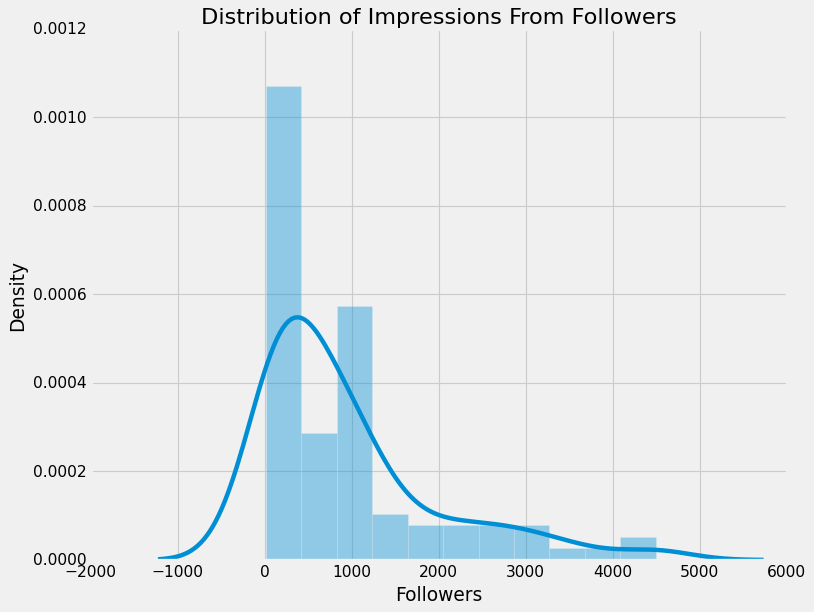

In [ ]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Followers")
sns.distplot(data['Followers'])
plt.show()

<ipython-input-20-877f62e3e693>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Likes'])


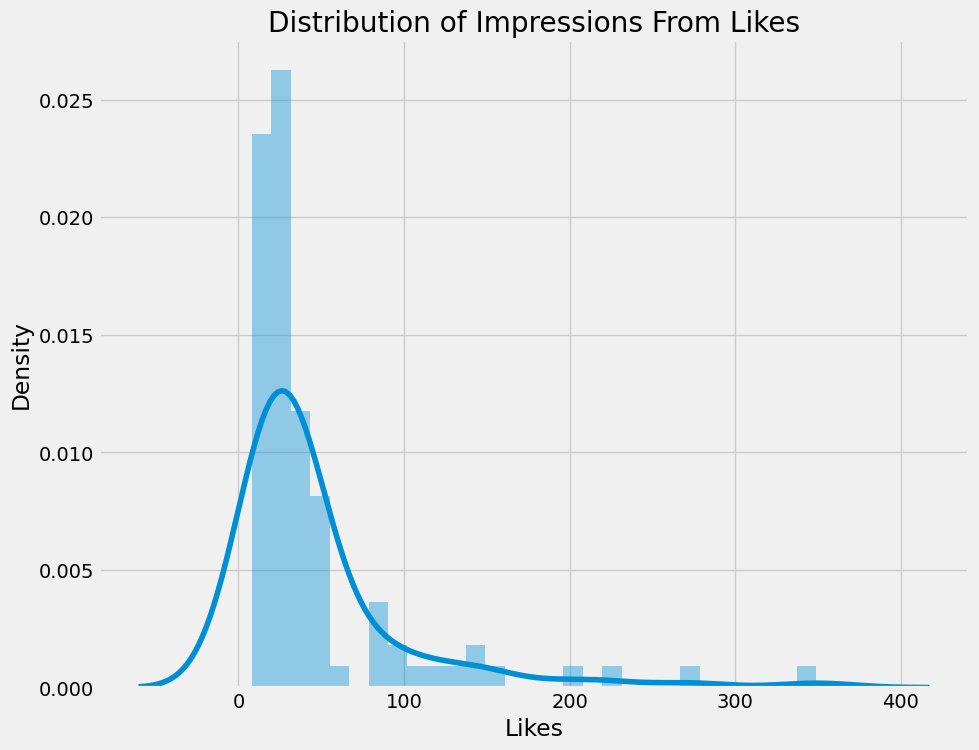

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Likes")
sns.distplot(data['Likes'])
plt.show()

In [ ]:
followers = data["Followers"].sum()
likes = data["Likes"].sum()

labels = ['Followers', 'Likes']
values = [followers, likes]

fig = px.pie(data, values=values, names=labels,
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

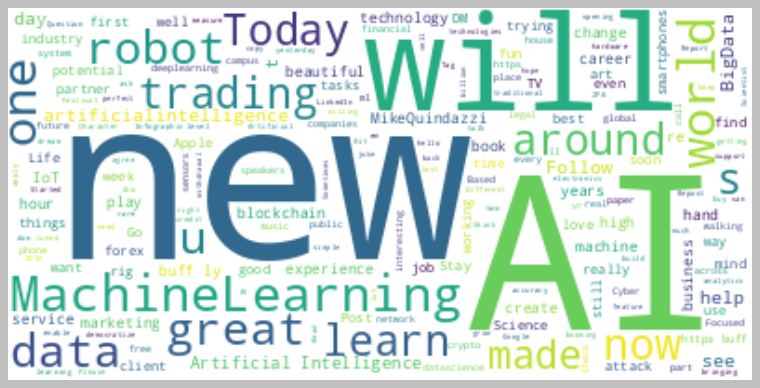

In [ ]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

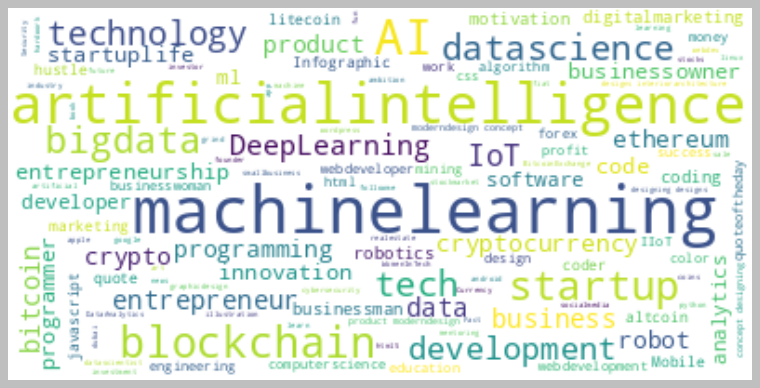

In [ ]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
figure = px.scatter(data_frame = data, x="Likes",
                    y="Followers", trendline="ols",
                    title = "Relationship Between Likes and Followers")
figure.show()